In [1]:
#Load dependencies
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Define data files to import
btcrawdata = '../data/rawdata/btcraw.csv'
ltcrawdata = '../data/rawdata/ltcraw.csv'
ethrawdata = '../data/rawdata/ethraw.csv'
trendsrawdata = '../data/rawdata/trendsraw.csv'

#Read data files into temporary Pandas data frames
tbtcdata = pd.read_csv(btcrawdata,index_col=0,parse_dates=True)
tltcdata = pd.read_csv(ltcrawdata,index_col=0,parse_dates=True)
tethdata = pd.read_csv(ethrawdata,index_col=0,parse_dates=True)
ttrendsdata = pd.read_csv(trendsrawdata,index_col=0,parse_dates=True)

In [2]:
#Create columns of daily change in value for cryptocurrencies (daily close - prior daily close or open)
tbtcdata['Bitcoin Daily Change (US$)']=tbtcdata['PriceUSD']-tbtcdata['PriceUSD'].shift(1)
tltcdata['Litecoin Daily Change (US$)']=tltcdata['PriceUSD']-tltcdata['PriceUSD'].shift(1)
tethdata['Ethereum Daily Change (US$)']=tethdata['PriceUSD']-tethdata['PriceUSD'].shift(1)

#Cleanup raw data files and discard all data prior to 2017
btcdata=tbtcdata.loc['2017':'2019']
ltcdata=tltcdata.loc['2017':'2019']
ethdata=tethdata.loc['2017':'2019']
ttrendsdata.rename(columns={'bitcoin':'Bitcoin Trend Metric','litecoin':'Litecoin Trend Metric','ethereum':'Ethereum Trend Metric','facebook libra':'Facebook Libra Trend Metric','cryptocurrency':'Cryptocurrency Trend Metric'},inplace=True)
trendsdata=ttrendsdata.loc['2017':'2019']

#Create dataset containing USD price of cryptocurrency
btc=btcdata[['PriceUSD','Bitcoin Daily Change (US$)']].copy()
btc.rename(columns={'PriceUSD':'Bitcoin Price (US$)'},inplace=True)
btccount=len(btc)
btcmissing=tbtcdata.isnull().sum().sum()
ltc=ltcdata[['PriceUSD','Litecoin Daily Change (US$)']].copy()
ltc.rename(columns={'PriceUSD':'Litecoin Price (US$)'},inplace=True)
ltccount=len(ltc)
ltcmissing=tltcdata.isnull().sum().sum()
eth=ethdata[['PriceUSD','Ethereum Daily Change (US$)']].copy()
eth.rename(columns={'PriceUSD':'Ethereum Price (US$)'},inplace=True)
ethcount=len(eth)
ethmissing=tethdata.isnull().sum().sum()

tcrypto=pd.merge(btc,ltc,right_index=True,left_index=True,how='outer')
crypto=pd.merge(tcrypto,eth,right_index=True,left_index=True,how='outer')
cryptocount=len(crypto)

#Delete columns of data not needed (btcdata['PriceBTC'] column is all 1 and trendsdata['isPartial'] is irrelevant)
del btcdata['PriceBTC']
del trendsdata['isPartial']
trendscount=len(trendsdata)

#Print out lengths of merged datasets for gut check
print(f'Bitcoin dataset contain {btccount} records and has {btcmissing} values')
print(f'Litecoin dataset contain {ltccount} records and has {ltcmissing} values')
print(f'Ethereum dataset contain {ethcount} records and has {ethmissing} values')
print(f'Cryptocurrency dataset contain {cryptocount} records')
print(f'Google Trends dataset contain {trendscount} records')

Bitcoin dataset contain 1047 records and has 12736 values
Litecoin dataset contain 1047 records and has 11651 values
Ethereum dataset contain 1047 records and has 966 values
Cryptocurrency dataset contain 1047 records
Google Trends dataset contain 151 records


In [3]:
#Determine correlation coefficients for Cryptocurrencies
cryptocorr = crypto.corr()
cryptocorr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,Bitcoin Price (US$),Bitcoin Daily Change (US$),Litecoin Price (US$),Litecoin Daily Change (US$),Ethereum Price (US$),Ethereum Daily Change (US$)
Bitcoin Price (US$),1,0.043,0.84,0.05,0.67,0.071
Bitcoin Daily Change (US$),0.043,1,-0.012,0.54,-0.034,0.55
Litecoin Price (US$),0.84,-0.012,1,0.059,0.87,0.086
Litecoin Daily Change (US$),0.05,0.54,0.059,1,-0.01,0.66
Ethereum Price (US$),0.67,-0.034,0.87,-0.01,1,0.044
Ethereum Daily Change (US$),0.071,0.55,0.086,0.66,0.044,1


In [4]:
#Determine correlation coefficients for Google Trends data
trendscorr = trendsdata.corr()
trendscorr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,Bitcoin Trend Metric,Litecoin Trend Metric,Ethereum Trend Metric,Facebook Libra Trend Metric,Cryptocurrency Trend Metric
Bitcoin Trend Metric,1,0.85,0.83,0.0059,0.87
Litecoin Trend Metric,0.85,1,0.77,0.0096,0.76
Ethereum Trend Metric,0.83,0.77,1,-0.042,0.83
Facebook Libra Trend Metric,0.0059,0.0096,-0.042,1,0.014
Cryptocurrency Trend Metric,0.87,0.76,0.83,0.014,1


In [5]:
#Determine correlation coefficients for Bitcoin Price USD data
tbtccorr = btcdata.corr()
btccorr = tbtccorr[['PriceUSD','Bitcoin Daily Change (US$)']]
btccorr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,PriceUSD,Bitcoin Daily Change (US$)
AdrActCnt,0.46,0.069
BlkCnt,0.12,0.033
BlkSizeByte,0.24,0.06
BlkSizeMeanByte,0.16,0.037
CapMVRVCur,0.12,0.13
CapMrktCurUSD,1,0.042
CapRealUSD,0.71,-0.051
DiffMean,0.42,-0.03
FeeMeanNtv,0.056,-0.041
FeeMeanUSD,0.54,-0.04


In [6]:
#Determine correlation coefficients for Litecoin Price USD data
tltccorr = ltcdata.corr()
ltccorr = tltccorr[['PriceUSD','Litecoin Daily Change (US$)']]
ltccorr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,PriceUSD,Litecoin Daily Change (US$)
AdrActCnt,0.84,0.0054
BlkCnt,0.075,0.049
BlkSizeByte,0.73,0.0027
BlkSizeMeanByte,0.72,-0.0019
CapMVRVCur,0.42,0.15
CapMrktCurUSD,1,0.057
CapRealUSD,0.61,-0.059
DiffMean,0.27,-0.04
FeeMeanNtv,-0.32,0.0026
FeeMeanUSD,0.73,0.0082


In [7]:
#Determine correlation coefficients for Ethereum data
tethcorr = ethdata.corr()
ethcorr = tethcorr[['PriceUSD','Ethereum Daily Change (US$)']]
ethcorr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,PriceUSD,Ethereum Daily Change (US$)
AdrActCnt,0.71,-0.023
BlkCnt,-0.065,-0.016
BlkSizeByte,0.5,-0.012
BlkSizeMeanByte,0.56,-0.0071
CapMrktCurUSD,1,0.042
DiffMean,0.44,-0.071
FeeMeanNtv,0.17,0.029
FeeMeanUSD,0.68,0.063
FeeMedNtv,0.28,0.044
FeeMedUSD,0.71,0.066


<Figure size 1440x1440 with 0 Axes>

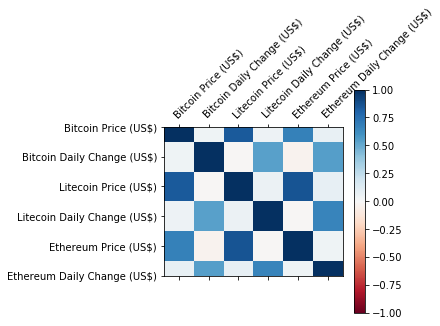

In [8]:
#Plot correlation coefficients for Cryptocurrencies
plt.figure(figsize=(20,20))
plt.matshow(crypto.corr(), cmap='RdBu')
plt.xticks(range(6), crypto.columns, fontsize=10, rotation=45, ha='left', rotation_mode='anchor')
plt.yticks(range(6), crypto.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.clim(-1,1)
plt.savefig('../final/graphics/cryptocurrenciescorrelations.png',transparent=True)

<Figure size 1440x1440 with 0 Axes>

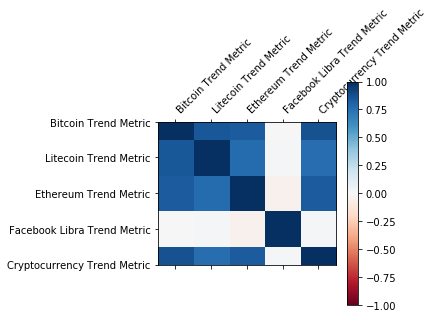

In [9]:
#Plot correlation coefficients for Google Trends data
plt.figure(figsize=(20,20))
plt.matshow(trendsdata.corr(), cmap='RdBu')
plt.xticks(range(trendsdata.shape[1]), trendsdata.columns, fontsize=10, rotation=45, ha='left')
plt.yticks(range(trendsdata.shape[1]), trendsdata.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.clim(-1,1)
plt.savefig('../final/graphics/googletrendcorrelations.png',transparent=True)

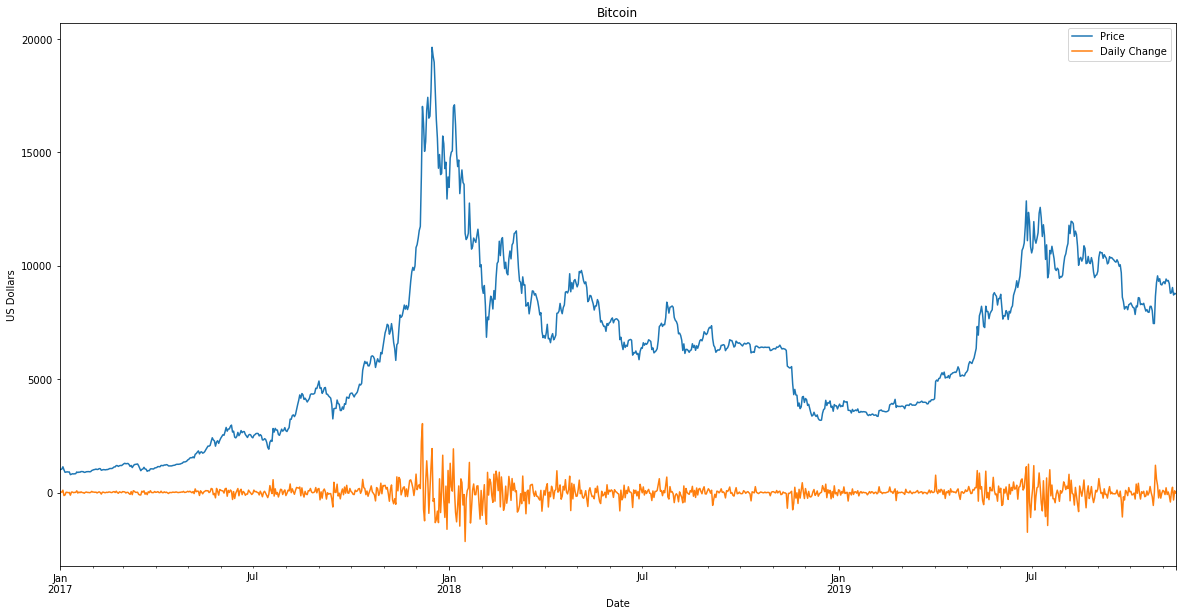

In [10]:
#Plot Bitcoin Price over time
plt.figure(figsize=(20,10)) 
btcdata['PriceUSD'].plot(label='Price')
crypto['Bitcoin Daily Change (US$)'].plot(label='Daily Change')
plt.title('Bitcoin')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('US Dollars')
plt.savefig('../final/graphics/bitcoin.png',transparent=True)

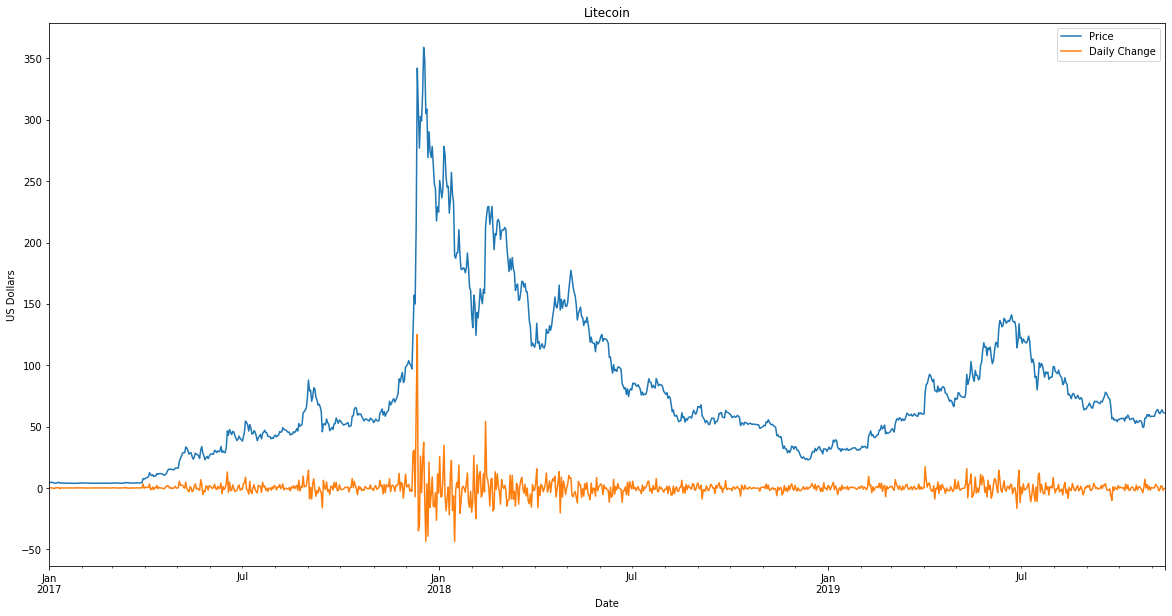

In [11]:
#Plot Litecoin Price over time
plt.figure(figsize=(20,10)) 
ltcdata['PriceUSD'].plot(label='Price')
crypto['Litecoin Daily Change (US$)'].plot(label='Daily Change')
plt.title('Litecoin')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('US Dollars')
plt.savefig('../final/graphics/litecoin.png',transparent=True)

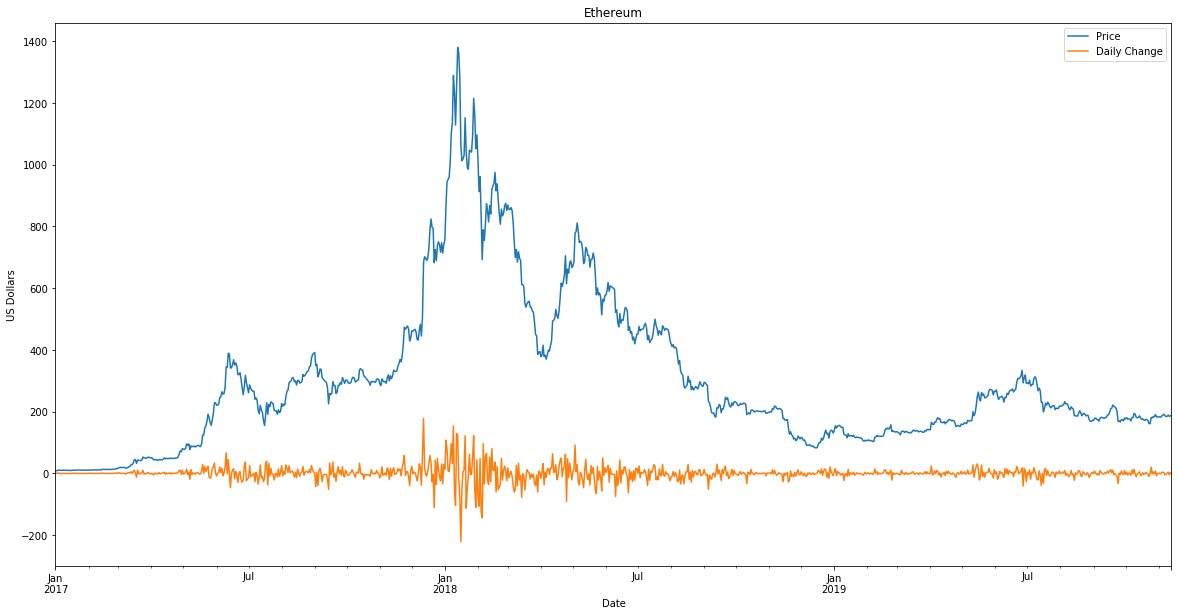

In [12]:
#Plot Ethereum Price over time
plt.figure(figsize=(20,10)) 
ethdata['PriceUSD'].plot(label='Price')
crypto['Ethereum Daily Change (US$)'].plot(label='Daily Change')
plt.title('Ethereum')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('US Dollars')
plt.savefig('../final/graphics/ethereum.png',transparent=True)

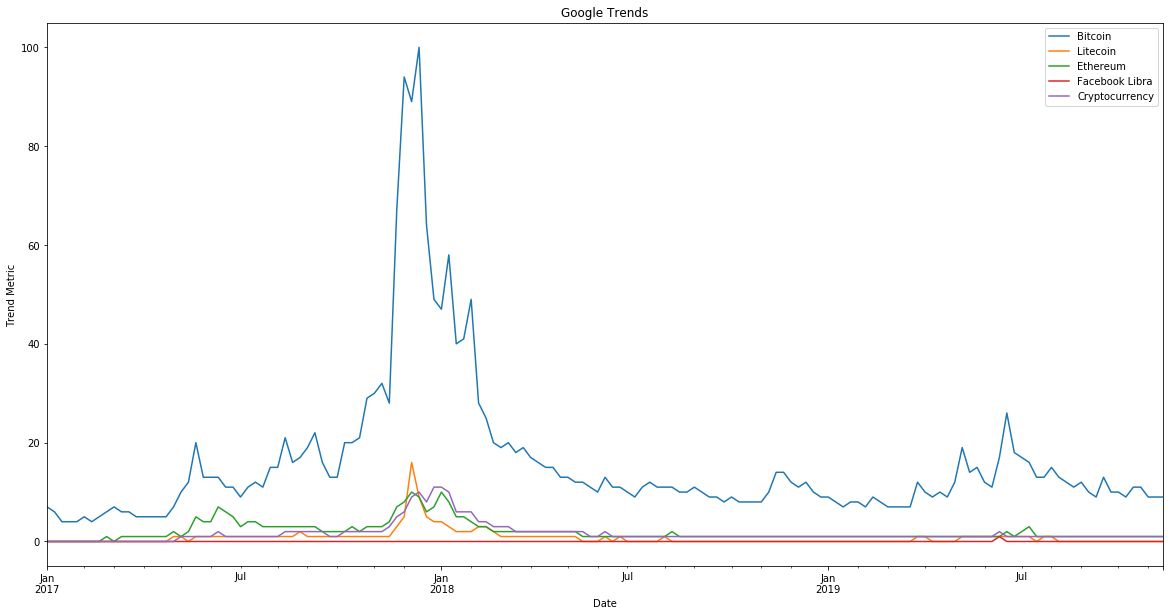

In [13]:
#Plot Google Trends over time
plt.figure(figsize=(20,10)) 
trendsdata['Bitcoin Trend Metric'].plot(label='Bitcoin')
trendsdata['Litecoin Trend Metric'].plot(label='Litecoin')
trendsdata['Ethereum Trend Metric'].plot(label='Ethereum')
trendsdata['Facebook Libra Trend Metric'].plot(label='Facebook Libra')
trendsdata['Cryptocurrency Trend Metric'].plot(label='Cryptocurrency')
plt.title('Google Trends')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Trend Metric')
plt.savefig('../final/graphics/googletrends.png',transparent=True)

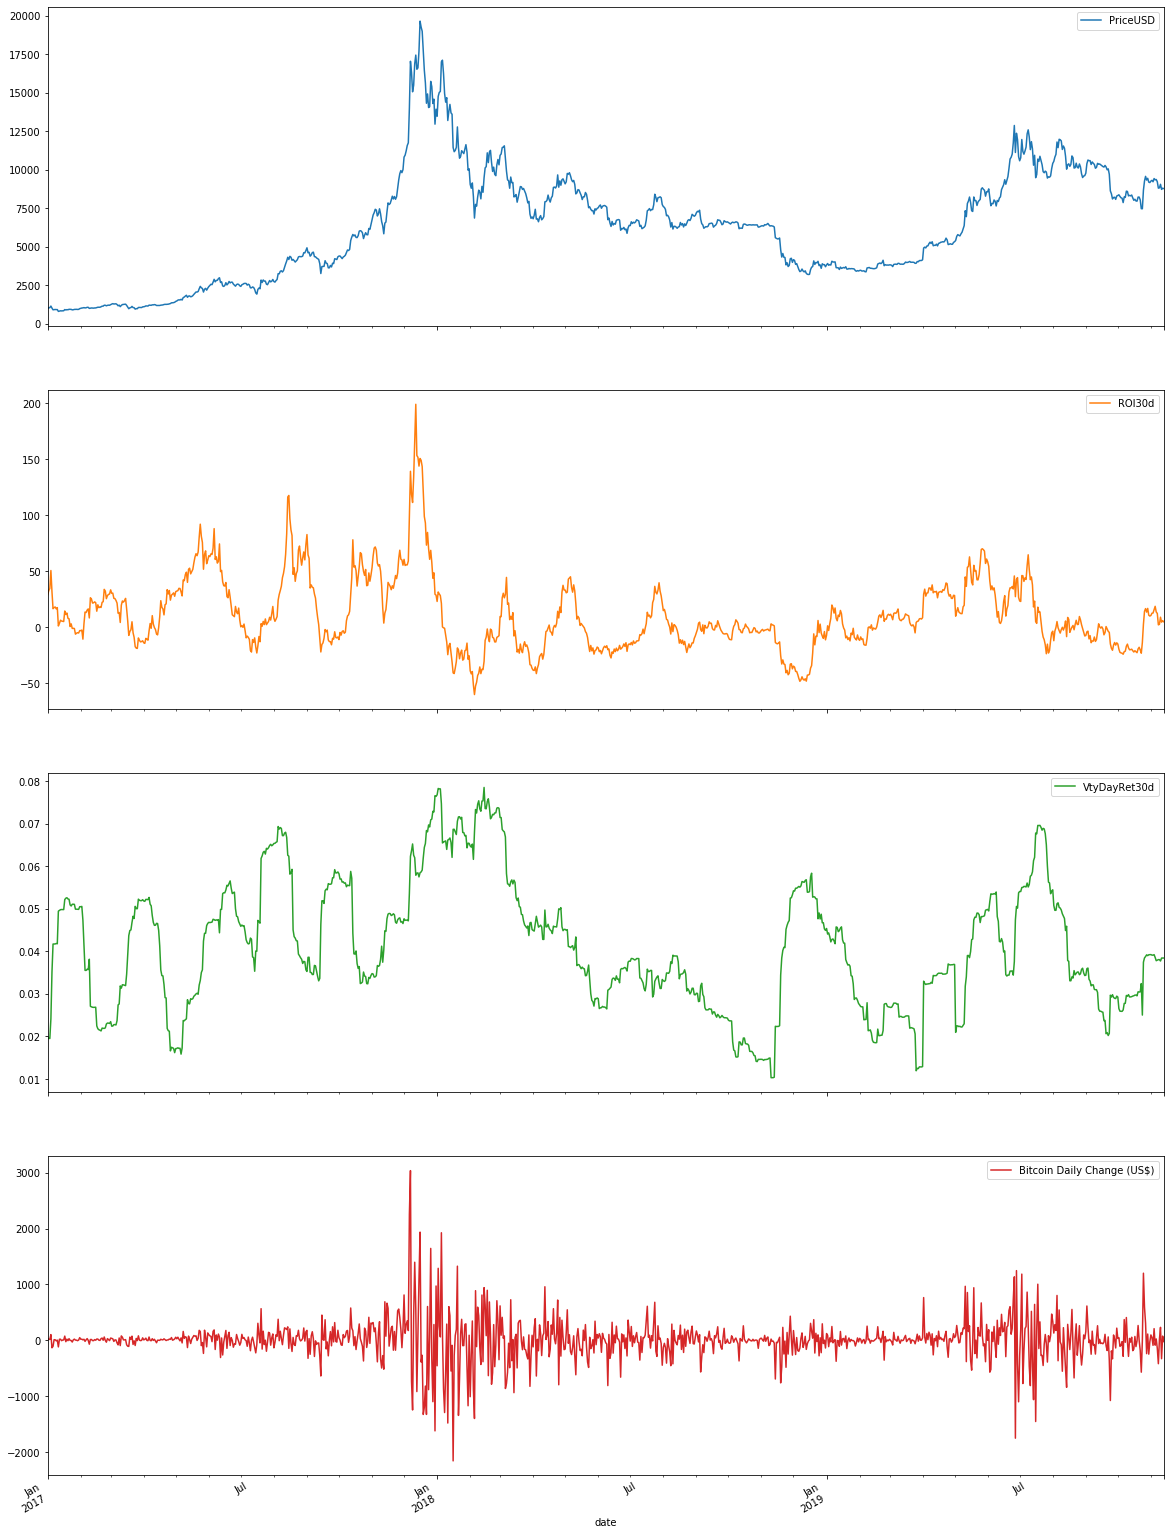

In [14]:
#Subplots of Bitcoin Data
varplots = ['PriceUSD','ROI30d','VtyDayRet30d','Bitcoin Daily Change (US$)']
axes = btcdata[varplots].plot(figsize=(20,30),subplots=True)
plt.savefig('../final/graphics/bitcoinsubplots.png',transparent=True)

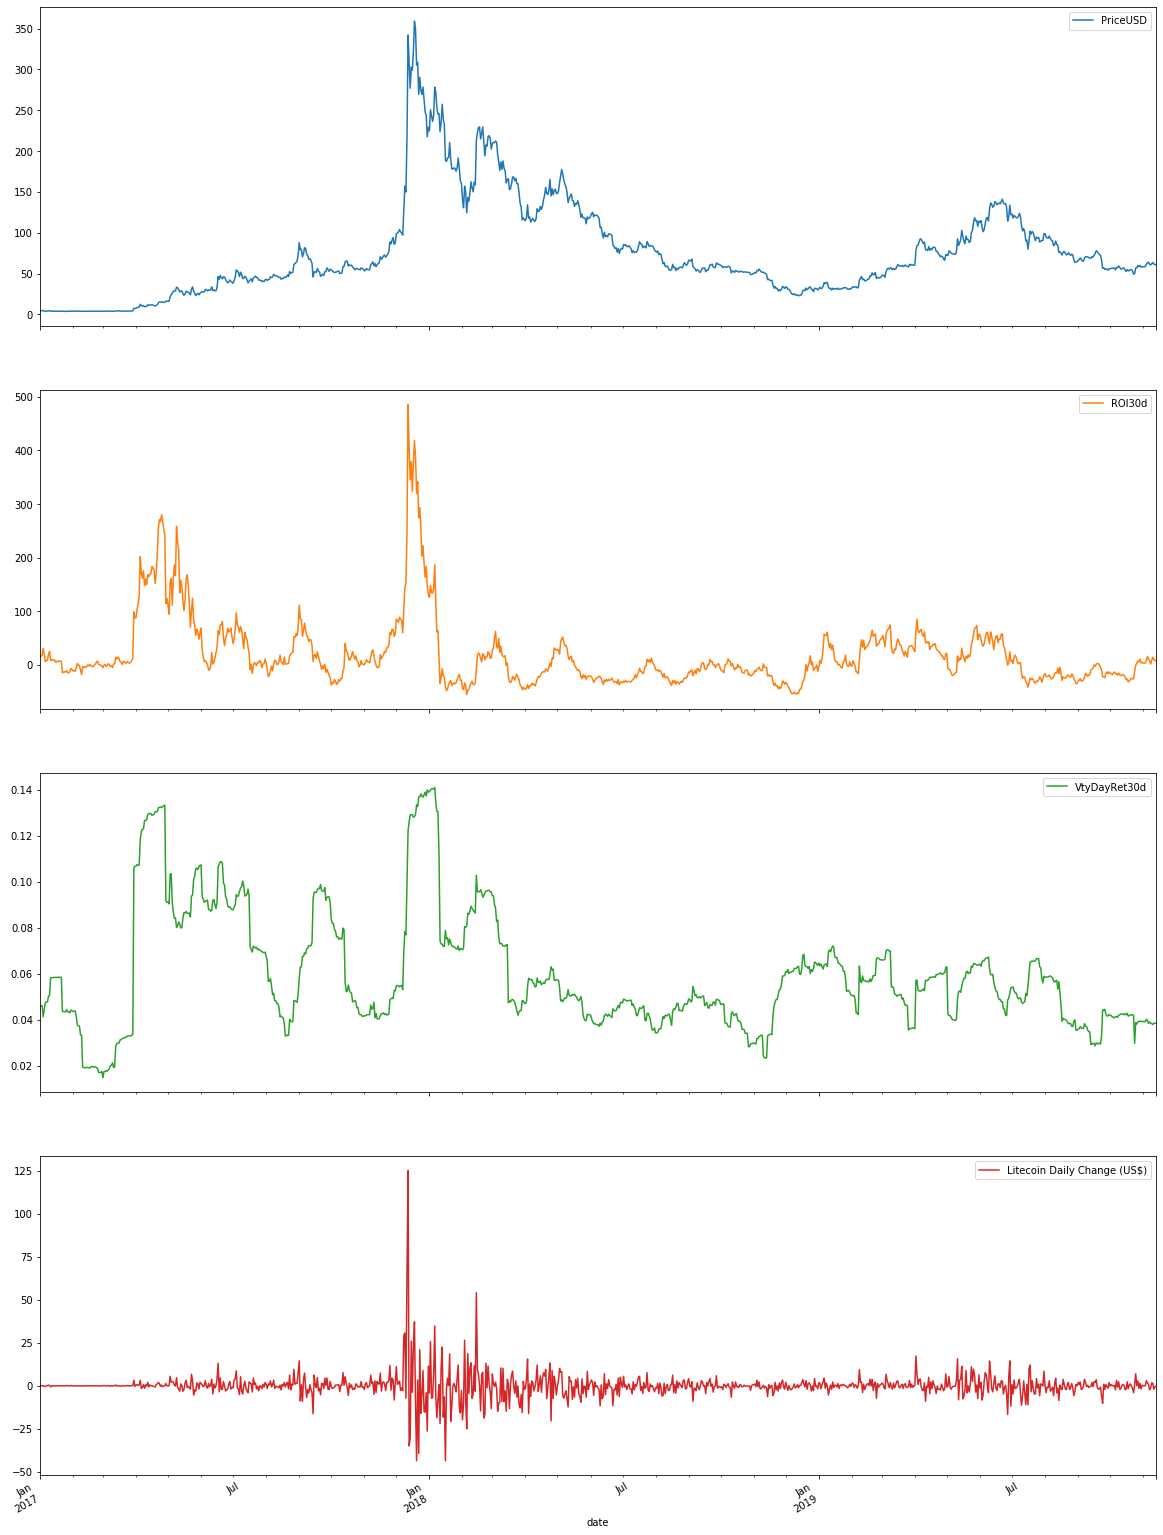

In [15]:
#Subplots of Litecoin Data
varplots = ['PriceUSD','ROI30d','VtyDayRet30d','Litecoin Daily Change (US$)']
axes = ltcdata[varplots].plot(figsize=(20,30),subplots=True)
plt.savefig('../final/graphics/litecoinsubplots.png',transparent=True)

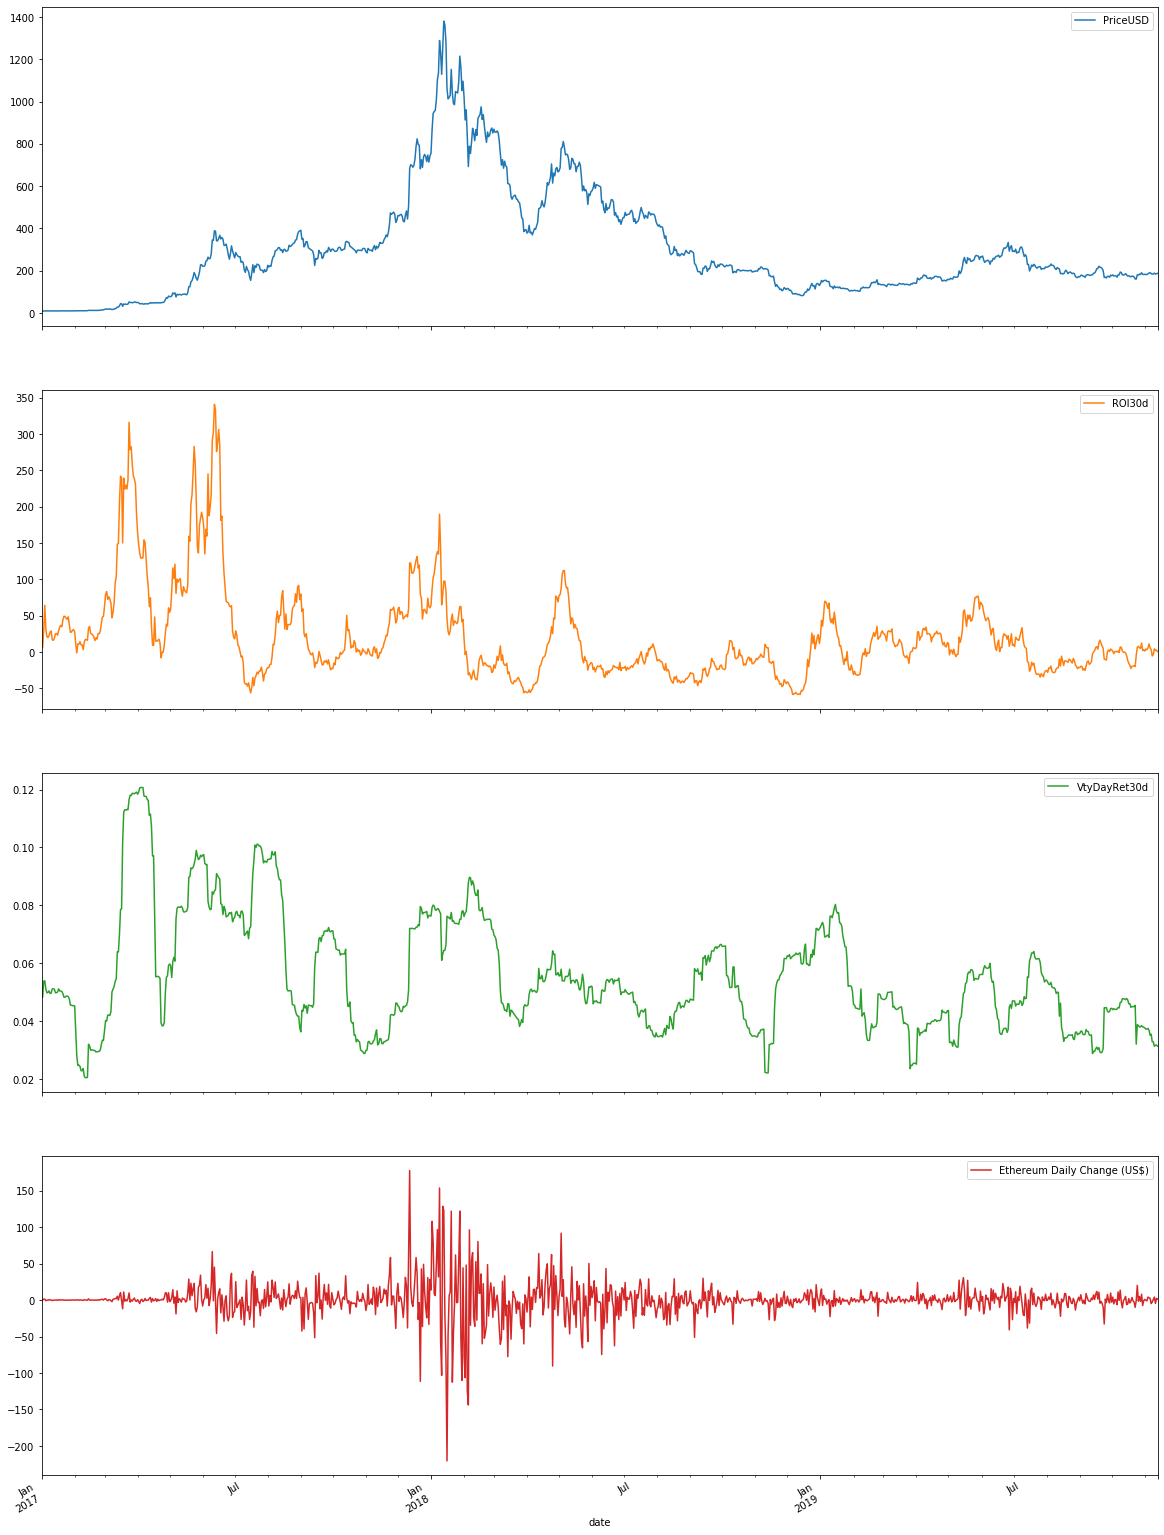

In [16]:
#Subplots of Ethereum Data
varplots = ['PriceUSD','ROI30d','VtyDayRet30d','Ethereum Daily Change (US$)']
axes = ethdata[varplots].plot(figsize=(20,30),subplots=True)
plt.savefig('../final/graphics/ethereumsubplots.png',transparent=True)

In [17]:
#Create dataframe containing crypto and trends data
cryptotrends = pd.merge(crypto,trendsdata,right_index=True,left_index=True,how='outer')
cryptotrends = cryptotrends.dropna()

In [18]:
#Create a csv file containing the final dataset
cryptotrends.to_csv('../data/finaldata/cryptotrends.csv',index=True,header=True)

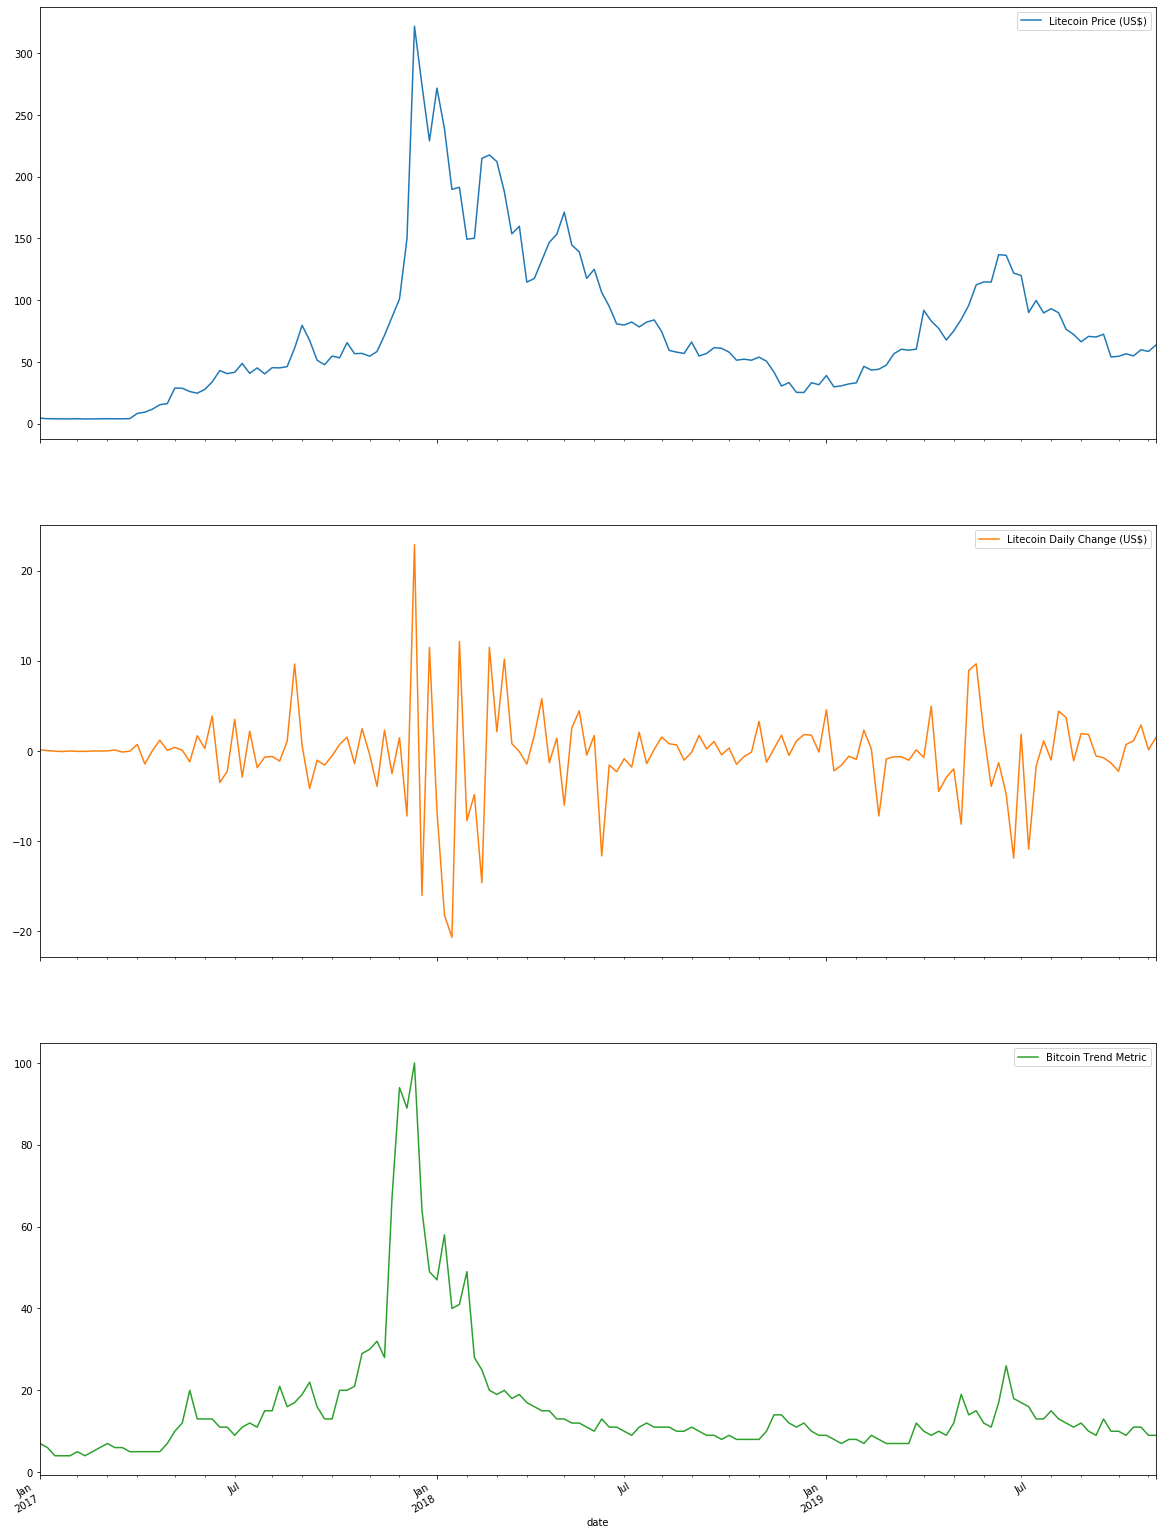

In [19]:
#Create a final plot representing a start in modeling data
finalplot = ['Litecoin Price (US$)','Litecoin Daily Change (US$)','Bitcoin Trend Metric']
axes = cryptotrends[finalplot].plot(figsize=(20,30),subplots=True)
plt.savefig('../final/graphics/finalsubplots.png',transparent=True)

In [20]:
#Create column to groupby month
datecrypto = crypto
datecrypto['Month'] = datecrypto.index.strftime('%m')

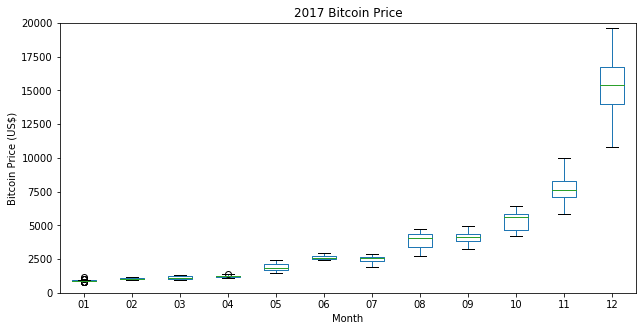

In [21]:
#Create 2017 monthly boxplots for Bitcoin price 
ax = datecrypto.loc['2017'].boxplot(by='Month',column=['Bitcoin Price (US$)'],grid=False,figsize=(10,5))
ax.get_figure().suptitle('')
ax.set_ylim(0,20000)
ax.set_title('2017 Bitcoin Price')
ax.set_ylabel('Bitcoin Price (US$)')
plt.savefig('../final/graphics/2017bitcoinboxplot.png',transparent=True)

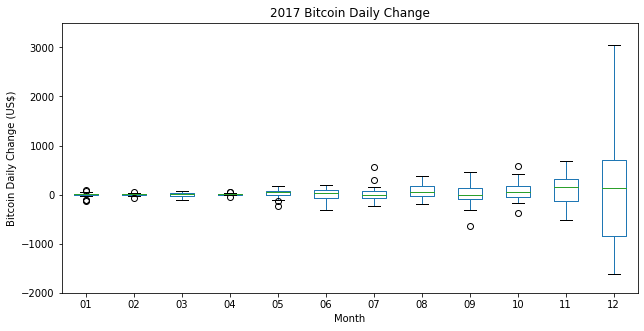

In [22]:
#Create 2017 monthly boxplots for Bitcoin change 
ax = datecrypto.loc['2017'].boxplot(by='Month',column=['Bitcoin Daily Change (US$)'],grid=False,figsize=(10,5))
ax.get_figure().suptitle('')
ax.set_ylim(-2000,3500)
ax.set_title('2017 Bitcoin Daily Change')
ax.set_ylabel('Bitcoin Daily Change (US$)')
plt.savefig('../final/graphics/2017bitcoinchangeboxplot.png',transparent=True)

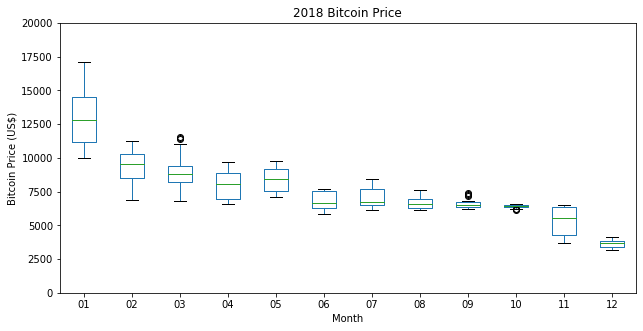

In [23]:
#Create 2018 monthly boxplots for Bitcoin price  
ax = datecrypto.loc['2018'].boxplot(by='Month',column=['Bitcoin Price (US$)'],grid=False,figsize=(10,5))
ax.get_figure().suptitle('')
ax.set_ylim(0,20000)
ax.set_title('2018 Bitcoin Price')
ax.set_ylabel('Bitcoin Price (US$)')
plt.savefig('../final/graphics/2018bitcoinboxplot.png',transparent=True)

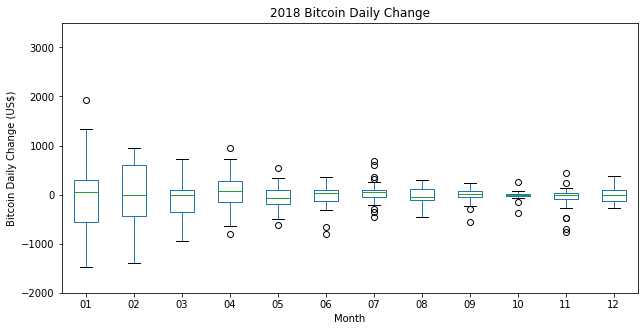

In [24]:
#Create 2018 monthly boxplots for Bitcoin change
ax = datecrypto.loc['2018'].boxplot(by='Month',column=['Bitcoin Daily Change (US$)'],grid=False,figsize=(10,5))
ax.get_figure().suptitle('')
ax.set_ylim(-2000,3500)
ax.set_title('2018 Bitcoin Daily Change')
ax.set_ylabel('Bitcoin Daily Change (US$)')
plt.savefig('../final/graphics/2018bitcoinchangeboxplot.png',transparent=True)

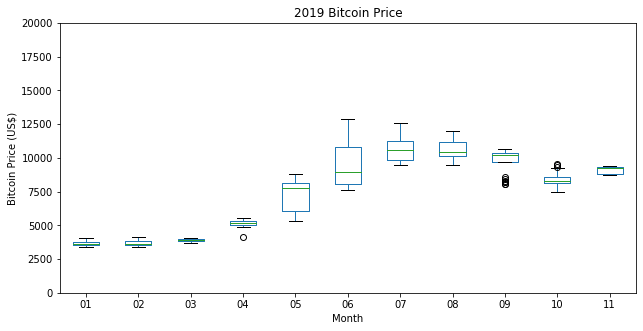

In [25]:
#Create 2019 monthly boxplots for Bitcoin price 
ax = datecrypto.loc['2019'].boxplot(by='Month',column=['Bitcoin Price (US$)'],grid=False,figsize=(10,5))
ax.get_figure().suptitle('')
ax.set_ylim(0,20000)
ax.set_title('2019 Bitcoin Price')
ax.set_ylabel('Bitcoin Price (US$)')
plt.savefig('../final/graphics/2019bitcoinboxplot.png',transparent=True)

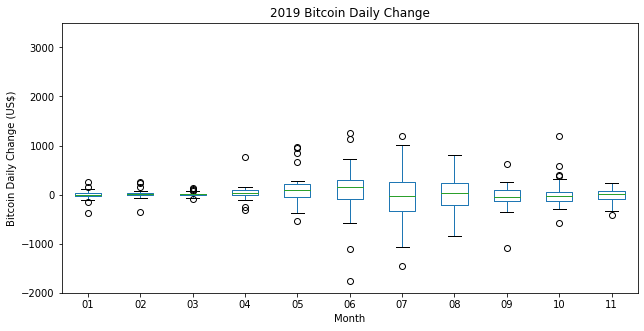

In [26]:
#Create 2019 monthly boxplots for Bitcoin change
ax = datecrypto.loc['2019'].boxplot(by='Month',column=['Bitcoin Daily Change (US$)'],grid=False,figsize=(10,5))
ax.get_figure().suptitle('')
ax.set_ylim(-2000,3500)
ax.set_title('2019 Bitcoin Daily Change')
ax.set_ylabel('Bitcoin Daily Change (US$)')
plt.savefig('../final/graphics/2019bitcoinchangeboxplot.png',transparent=True)